In [1]:
# Install fake-useragent library

from fake_useragent import UserAgent
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import sent_tokenize


nltk.download('punkt')


url = 'https://www.nytimes.com/section/business'

# Create a UserAgent object
user_agent = UserAgent()

# Set the User-Agent header
headers = {'User-Agent': user_agent.chrome}

# Send an HTTP GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract headings (h1, h2, h3, etc.)
    headings = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])

    # Extract paragraphs (p)
    paragraphs = soup.find_all('p')

    # Combine headings and paragraphs into a single string variable
    extracted_text = ""
    for item in headings + paragraphs:
        extracted_text += item.get_text() + "\n\n"  # Add each item's text content to the string variable

    # Tokenize the extracted text into sentences
    sentences = sent_tokenize(extracted_text)

    # Filter out sentences with fewer than 6 words
    sentences = [sentence for sentence in sentences if len(sentence.split()) > 5]

    # Remove '\n' characters from sentences
    sentences = [sentence.replace('\n', ' ') for sentence in sentences]

    # Print the list of sentences
    print(sentences)
else:
    print('Failed to retrieve the webpage')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Business  Highlights  Plan to Stash Pollution Beneath the Sea Could Save Money and Jobs  How to Revive a Burned Forest?', 'Rebuild the Tree Supply Chain  TikTok Turns to Nuns, Veterans and Ranchers in Marketing Blitz  Disney Fends Off Activist Investor for Second Time in 2 Years  Latest  China’s Young People Are Giving Up on Saving for Retirement  A Looming Question for Paramount’s Board: How to Navigate Shari Redstone  Richard Benedick, Negotiator of Landmark Ozone Treaty, Dies at 88  Kate Shindle on Why She’s Stepping Down as Actors’ Equity President  Eclipse’s Path Is Also Leaving a Trail of High Hotel Prices  Denmark Closes Shipping Lane Over Risk of Accidental Missile Launch  Ford Slows Its Push Into Electric Vehicles  Tell Us Your Stories About Retirement  Biden Takes Aim at SpaceX’s Tax-Free Ride in American Airspace  Trump Venues Bank on Golf, With Help From Saudi Arabia  Business Delivered to Your Inbox  Sign up for one of our daily or weekly newsletters.', 'DealBook  Your M

In [2]:
import re

# Define a function to remove extra white spaces from a list of strings
def remove_extra_spaces_from_list(sentences):
    # Iterate over each string in the list
    cleaned_list = []
    for text in sentences:
        # Use regular expression to replace multiple white spaces with a single white space
        cleaned_text = re.sub(r'\s+', ' ', text)
        cleaned_list.append(cleaned_text)
    return cleaned_list

# Example usage
list_with_extra_spaces = ["This    is     a    sentence   with  extra     spaces.", "Another    example   with    extra    spaces."]
modifiedSentences = remove_extra_spaces_from_list(sentences)
print(modifiedSentences)


['Business Highlights Plan to Stash Pollution Beneath the Sea Could Save Money and Jobs How to Revive a Burned Forest?', 'Rebuild the Tree Supply Chain TikTok Turns to Nuns, Veterans and Ranchers in Marketing Blitz Disney Fends Off Activist Investor for Second Time in 2 Years Latest China’s Young People Are Giving Up on Saving for Retirement A Looming Question for Paramount’s Board: How to Navigate Shari Redstone Richard Benedick, Negotiator of Landmark Ozone Treaty, Dies at 88 Kate Shindle on Why She’s Stepping Down as Actors’ Equity President Eclipse’s Path Is Also Leaving a Trail of High Hotel Prices Denmark Closes Shipping Lane Over Risk of Accidental Missile Launch Ford Slows Its Push Into Electric Vehicles Tell Us Your Stories About Retirement Biden Takes Aim at SpaceX’s Tax-Free Ride in American Airspace Trump Venues Bank on Golf, With Help From Saudi Arabia Business Delivered to Your Inbox Sign up for one of our daily or weekly newsletters.', 'DealBook Your Money Site Index Sit

In [3]:
%pip install transformers
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

model = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis",num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# sentences = ["there is a shortage of capital, and we need extra financing",
#              "growth is strong and we have plenty of liquidity",
#              "there are doubts about our finances",
#              "profits are flat"]
results = nlp(sentences)
print(modifiedSentences)
print(results)
print(type(results))




Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\KIIT\.cache\huggingface\hub\models--ahmedrachid--FinancialBERT-Sentiment-Analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/369 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/464k [00:00<?, ?B/s]

['Business Highlights Plan to Stash Pollution Beneath the Sea Could Save Money and Jobs How to Revive a Burned Forest?', 'Rebuild the Tree Supply Chain TikTok Turns to Nuns, Veterans and Ranchers in Marketing Blitz Disney Fends Off Activist Investor for Second Time in 2 Years Latest China’s Young People Are Giving Up on Saving for Retirement A Looming Question for Paramount’s Board: How to Navigate Shari Redstone Richard Benedick, Negotiator of Landmark Ozone Treaty, Dies at 88 Kate Shindle on Why She’s Stepping Down as Actors’ Equity President Eclipse’s Path Is Also Leaving a Trail of High Hotel Prices Denmark Closes Shipping Lane Over Risk of Accidental Missile Launch Ford Slows Its Push Into Electric Vehicles Tell Us Your Stories About Retirement Biden Takes Aim at SpaceX’s Tax-Free Ride in American Airspace Trump Venues Bank on Golf, With Help From Saudi Arabia Business Delivered to Your Inbox Sign up for one of our daily or weekly newsletters.', 'DealBook Your Money Site Index Sit

In [4]:
# Iterate over each sentence and its corresponding result
for sentence, result in zip(modifiedSentences[:10], results[:10]):
    print("Sentence:", sentence)
    print("Sentiment:", result['label'])
    print("Score:", result['score'])
    print()

Sentence: Business Highlights Plan to Stash Pollution Beneath the Sea Could Save Money and Jobs How to Revive a Burned Forest?
Sentiment: neutral
Score: 0.9995713829994202

Sentence: Rebuild the Tree Supply Chain TikTok Turns to Nuns, Veterans and Ranchers in Marketing Blitz Disney Fends Off Activist Investor for Second Time in 2 Years Latest China’s Young People Are Giving Up on Saving for Retirement A Looming Question for Paramount’s Board: How to Navigate Shari Redstone Richard Benedick, Negotiator of Landmark Ozone Treaty, Dies at 88 Kate Shindle on Why She’s Stepping Down as Actors’ Equity President Eclipse’s Path Is Also Leaving a Trail of High Hotel Prices Denmark Closes Shipping Lane Over Risk of Accidental Missile Launch Ford Slows Its Push Into Electric Vehicles Tell Us Your Stories About Retirement Biden Takes Aim at SpaceX’s Tax-Free Ride in American Airspace Trump Venues Bank on Golf, With Help From Saudi Arabia Business Delivered to Your Inbox Sign up for one of our daily

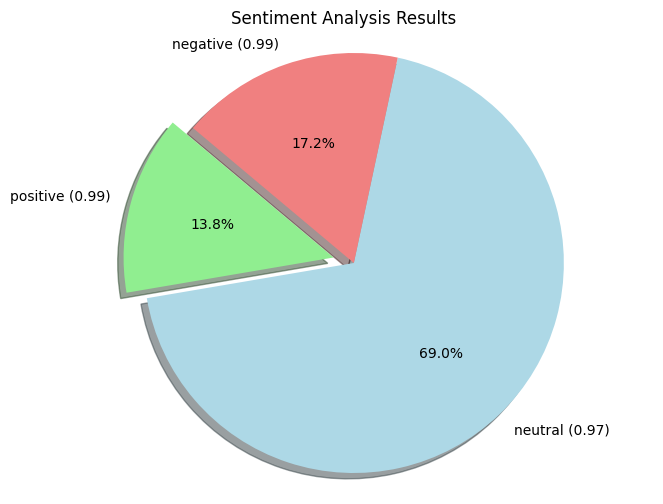

In [5]:
import matplotlib.pyplot as plt

# Output data
labels = ['positive', 'neutral', 'negative']
label_counts = {'positive': 0, 'neutral': 0, 'negative': 0}
label_scores = {'positive': 0, 'neutral': 0, 'negative': 0}

# Count the occurrences of each label and calculate total score for each label
for result in results:
    label = result['label']
    label_counts[label] += 1
    label_scores[label] += result['score']

# Calculate mean score for each label
mean_scores = [label_scores[label] / label_counts[label] if label_counts[label] > 0 else 0 for label in labels]

# Pie chart
sizes = [label_counts[label] for label in labels]
colors = ['lightgreen', 'lightblue', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add mean score value for each label as annotation
for i, (label, mean_score) in enumerate(zip(labels, mean_scores)):
    texts[i].set_text(f"{labels[i]} ({mean_score:.2f})")

plt.title('Sentiment Analysis Results')
plt.axis('equal')
plt.show()


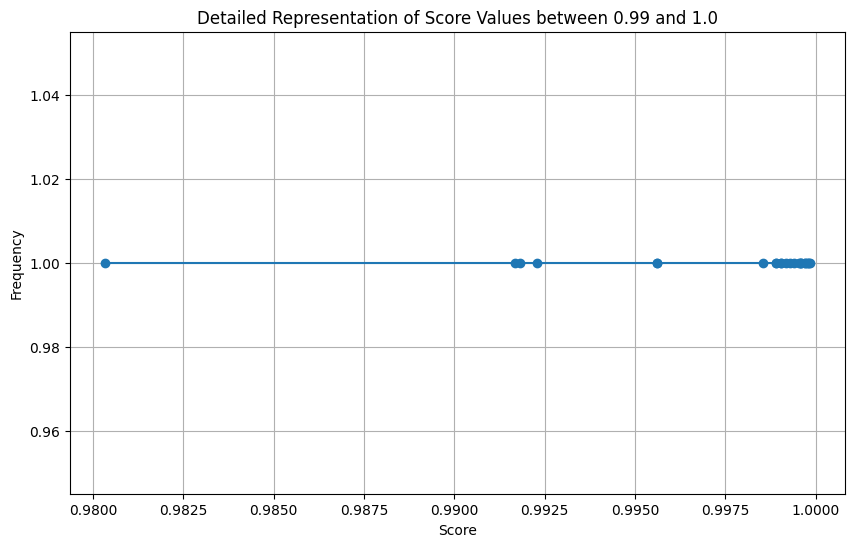

In [6]:
import matplotlib.pyplot as plt

# Extract scores
scores = [result['score'] for result in results]

# Count the frequency of each score
score_counts = {}
for score in scores:
    if score in score_counts:
        score_counts[score] += 1
    else:
        score_counts[score] = 1

# Extract scores and their frequencies
sorted_scores = sorted(score_counts.keys())
frequencies = [score_counts[score] for score in sorted_scores]

# Filter scores and frequencies for scores between 0.99 and 1.0
filtered_scores = []
filtered_frequencies = []
for score, freq in zip(sorted_scores, frequencies):
    if 0.97 <= score <= 1.0:
        filtered_scores.append(score)
        filtered_frequencies.append(freq)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_scores, filtered_frequencies, marker='o', linestyle='-')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Detailed Representation of Score Values between 0.99 and 1.0')
plt.grid(True)
plt.show()
